#Assignment 3:
    test if the distribution of ages can be modelled by a Gaussian
    
    1) all riders
    
    2) summer riders vs winder riders
    
    use 2 tests, you can use KS, AD, or get creative. use KL or chi2 like you did in Assignment2 or perhaps new ones!
    
    CHALLANGE! look for a better distribution to fit the data! see notes on how to input a number of different 
    distributions into the test, not just 'norm' and the few others available by keyword

my usual imports and setups

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load(open ("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

#i know i will use scipy for the tests
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


I need 2 seasons, lets start reading in data from January 2015, and June 2015. 
One month is not a season. You should import data from other months in the winter as well, and then several summer months to get the other distribution. I am being lazy but you should not be. 



In [72]:
#My viturl system cannot handle the data for the whole year
#So I select two months for each season
df_Sep=pd.read_csv('201409-citibike-tripdata.csv')
df_Oct=pd.read_csv('201410-citibike-tripdata.csv')
df_Jan=pd.read_csv('201501-citibike-tripdata.csv')
df_Feb=pd.read_csv('201502-citibike-tripdata.csv')

print df_Jan.columns
#merge winter data
FallWinter = [df_Sep, df_Oct, df_Jan, df_Feb]
dfW= pd.concat(FallWinter)

df_Apr=pd.read_csv('201504-citibike-tripdata.csv')
df_May=pd.read_csv('201505-citibike-tripdata.csv')

df_Jul=pd.read_csv('201507-citibike-tripdata.csv')
df_Aug=pd.read_csv('201508-citibike-tripdata.csv')
#merge summer data
SpringSummer = [df_Apr, df_May, df_Jul, df_Aug]
dfS= pd.concat(SpringSummer)

#print dfW.head()

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


## get the age like we did before, subscribers only cause otherwise the ages are really sparse anyways


In [73]:
#df is the dataframe where the content of the csv file is stored
df_W = 2015-dfW['birth year'][(dfW['usertype'] == 'Subscriber')]
df_S = 2015-dfS['birth year'][(dfS['usertype'] == 'Subscriber')]

print "Winter:", len(df_W), "Summer:", len(df_S)

Winter: 2088789 Summer: 3243981


lets split age in 10 year bins. see the comment in assignment 1 about this

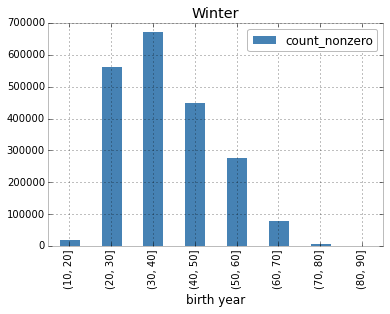

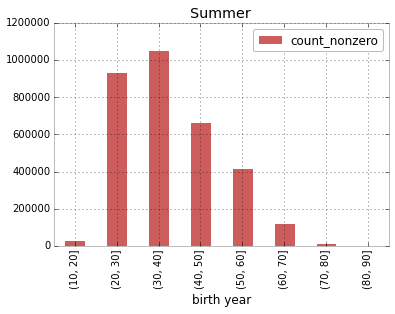

In [74]:
bins = np.arange(10, 99, 10)
df_W.groupby(pd.cut(df_W, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_dist = df_W.groupby(pd.cut(df_W, bins)).agg([count_nonzero])
df_S.groupby(pd.cut(df_S, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer",color='indianred')
S_dist = df_S.groupby(pd.cut(df_S, bins)).agg([count_nonzero])

#df_All.groupby(pd.cut(df_All, bins)).agg([count_nonzero]).plot(kind='bar', title="All Riders",color='Orange')
#All_dist = df_All.groupby(pd.cut(df_All, bins)).agg([count_nonzero])

how do they look? what should I expect? setting some expectation is useful as a sanity check!


lets run the scipy KS test

#KS testsfor goodness of fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [75]:
#compare to normal

ksW=scipy.stats.kstest(W_dist, 'norm')
ksS=scipy.stats.kstest(S_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to cauchy 

ksW=scipy.stats.kstest(W_dist, 'cauchy')
ksS=scipy.stats.kstest(S_dist, 'cauchy')
print "winter, cauchy fit", ksW
print "summer, cauchy fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, cauchy fit (0.99999952913574597, 0.0)
summer, cauchy fit (0.99999969745310935, 0.0)


the scipy KS test works with keywords only for scipy.stats distributions 
that take as a single argument the size of the sample, like norm and cauchy look them up to make sure I am right!
if i want to test against a distribution which takes more arguments like Poisson, which in scipy.stats takes the 
lambda parameter and the size (2 arguments) i can pass the extra arguments in arg, like i do below: 

In [76]:
ksW=scipy.stats.kstest(W_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_dist, 'gamma', args=(35,))

print "winter, Poisson fit", ksW
print "summer, Poisson fit", ksS

winter, Poisson fit (1.0, 0.0)
summer, Poisson fit (1.0, 0.0)


or i can create my function separately, then call it: all i need to do is define a function that calls  like i am doing below. the size argument must come first, and the second argument of kstest will no longer be a string, but the function itself (what we would call a "callable")

In [77]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2

In [78]:
ksW=scipy.stats.kstest(W_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_dist, mydistribution, args=(35,38))

print "winter, my distribution fit", ksW
print "summer, my distribution fit", ksS

winter, my distribution fit (1288824950.0, nan)
summer, my distribution fit (828115925.0, nan)


##TODO FOR YOU!

-- repeat with the AD test, and/or any other tests you wish

-- do you see differences in the sample? significant differences?

-- do you dare (and this is indeed optional but could be fun) splitting the samples by up- and down-town?

##Anderson Darling Test

In [79]:
#If A2 is larger than these critical values then for the corresponding significance level, 
#the null hypothesis that the data come from the chosen distribution can be rejected.

#AD test seems to be 1-dimentional
adW=scipy.stats.anderson(np.array(W_dist), dist='norm')
adS=scipy.stats.anderson(np.array(S_dist), dist='norm')
print "##winter, normal fit##"
print "A2", adW[0]
print "AD critical values", adW[1]
print "AD significance level", adW[2]
print ""
print "##Summer, normal fit##"
print "A2", adS[0]
print "AD critical values", adS[1]
print "AD significance level", adS[2]
print ""

#Assume I want 1% significance level
thresholdW = adW[1][adW[2]==[1.0]]
A2W = adW[0][adW[2]==[1.0]]
print "At 1% significance level:", "A2:", A2W, "critical value:", thresholdW
if A2W>thresholdW:
    print "The Null hypothesis is rejected for Winter data. It does not come from normal distribution"
else:
    print "The Null hypothesis is not rejected"

thresholdS = adS[1][adS[2]==[1.0]]
A2S = adS[0][adS[2]==[1.0]]
print "At 1% significance level:", "A2:", A2S, "critical value:", thresholdS
if A2S>thresholdS:
    print "The Null hypothesis is rejected for Summer data. It does not come from normal distribution"
else:
    print "The Null hypothesis is not rejected"
    
    
print "------------------------------------------"
print ""
#compare to exponential

adW=scipy.stats.anderson(np.array(W_dist), dist='expon')
adS=scipy.stats.anderson(np.array(S_dist), dist='expon')
print "##winter, exponential fit##"
print "A2", adW[0]
print "AD critical values", adW[1]
print "AD significance level", adW[2]
print ""
print "##Summer, exponential fit##"
print "A2", adS[0]
print "AD critical values", adS[1]
print "AD significance level", adS[2]
print ""
#Assume I want 1% significance level
thresholdW = adW[1][adW[2]==[1.0]]
A2W = adW[0][adW[2]==[1.0]]
print "At 1% significance level:", "A2:", A2W, "critical value:", thresholdW
if A2W>thresholdW:
    print "The Null hypothesis is rejected for Winter data. It does not come from exponential distribution"
else:
    print "The Null hypothesis is not rejected"

thresholdS = adS[1][adS[2]==[1.0]]
A2S = adS[0][adS[2]==[1.0]]
print "At 1% significance level:", "A2:", A2S, "critical value:", thresholdS
if A2S>thresholdS:
    print "The Null hypothesis is rejected for Summer data. It does not come from exponential distribution"
else:
    print "The Null hypothesis is not rejected"

##winter, normal fit##
A2 [ -6.06709557  -2.20128671   1.66452215   5.53033101   9.39613987
  13.26194873  17.12775759  20.99356645]
AD critical values [ 0.519  0.591  0.709  0.827  0.984]
AD significance level [ 15.   10.    5.    2.5   1. ]

##Summer, normal fit##
A2 [ -6.06731165  -2.20193495   1.66344174   5.52881844   9.39419514
  13.25957184  17.12494853  20.99032523]
AD critical values [ 0.519  0.591  0.709  0.827  0.984]
AD significance level [ 15.   10.    5.    2.5   1. ]

At 1% significance level: A2: [ 9.39613987] critical value: [ 0.984]
The Null hypothesis is rejected for Winter data. It does not come from normal distribution
At 1% significance level: A2: [ 9.39419514] critical value: [ 0.984]
The Null hypothesis is rejected for Summer data. It does not come from normal distribution
------------------------------------------

##winter, exponential fit##
A2 [ -5.22099669   0.33700992   5.89501654  11.45302315  17.01102976
  22.56903638  28.12704299  33.68504961]
AD critica

###Our results show that the citibike distributions of springsummer riders/fallwinter riders do not follow a Normal or Exponential distirbution. More test is needed.